In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm


In [45]:
df = pd.read_csv('pokemon_data.csv')
df

,Total Power,HP,Attack,Defense,Legendary
0,318,45,49,49,0
1,405,60,62,63,0
2,525,80,82,83,0
3,625,80,100,123,0
4,309,39,52,43,0
...,...,...,...,...,...
795,600,50,100,150,1
796,700,50,160,110,1
797,600,80,110,60,1
798,680,80,160,60,1


In [46]:
df_dtypes = pd.DataFrame({'Columns':df.columns})

lst_nilai = []
for i in df_dtypes['Columns']:
  lst_nilai.append(df[[i]].sample(1).values[[0]])

df_dtypes['Value'] = lst_nilai
df_dtypes['Data Types'] = df.dtypes.values

df_dtypes = df_dtypes.reset_index().drop(columns = ['index'])
df_dtypes

,Columns,Value,Data Types
0,Total Power,[[245]],int64
1,HP,[[65]],int64
2,Attack,[[95]],int64
3,Defense,[[43]],int64
4,Legendary,[[0]],int64


In [ ]:
df.drop(columns=['Total Power']).columns

In [ ]:
df.isnull().sum()

In [ ]:
lst_missval = []

for i in df.isnull().sum():
  lst_missval.append((i / len(df) * 100))

df_missval = pd.DataFrame({'Column Name':df.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df.dtypes})

df_missval = df_missval.sort_values(by='Missing Value Percentage (%)', 
                       ascending = False).reset_index().drop(columns = 'index')

df_missval                       

In [ ]:
df.head()

In [47]:
df_dummy = df.copy()

df_dummy = pd.get_dummies(df_dummy, drop_first=True)
df_dummy

,Total Power,HP,Attack,Defense,Legendary
0,318,45,49,49,0
1,405,60,62,63,0
2,525,80,82,83,0
3,625,80,100,123,0
4,309,39,52,43,0
...,...,...,...,...,...
795,600,50,100,150,1
796,700,50,160,110,1
797,600,80,110,60,1
798,680,80,160,60,1


C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_1236\3556670955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Power'], bins=10, kde_kws={'linewidth': 3})


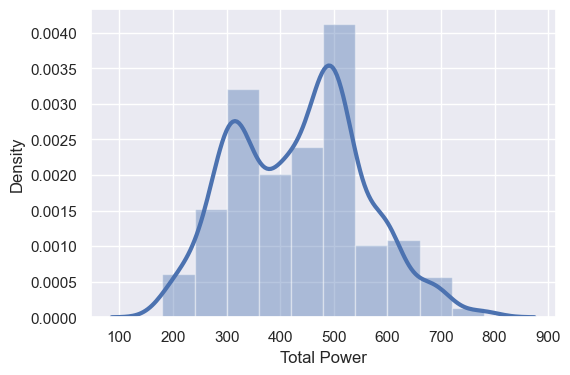

<function matplotlib.pyplot.show(close=None, block=None)>

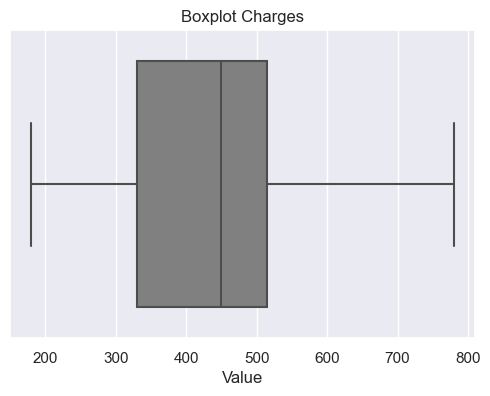

In [49]:
sns.set(rc={'figure.figsize':(6,4)}) 
sns.distplot(df['Total Power'], bins=10, kde_kws={'linewidth': 3})
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Total Power'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot Charges')
plt.show

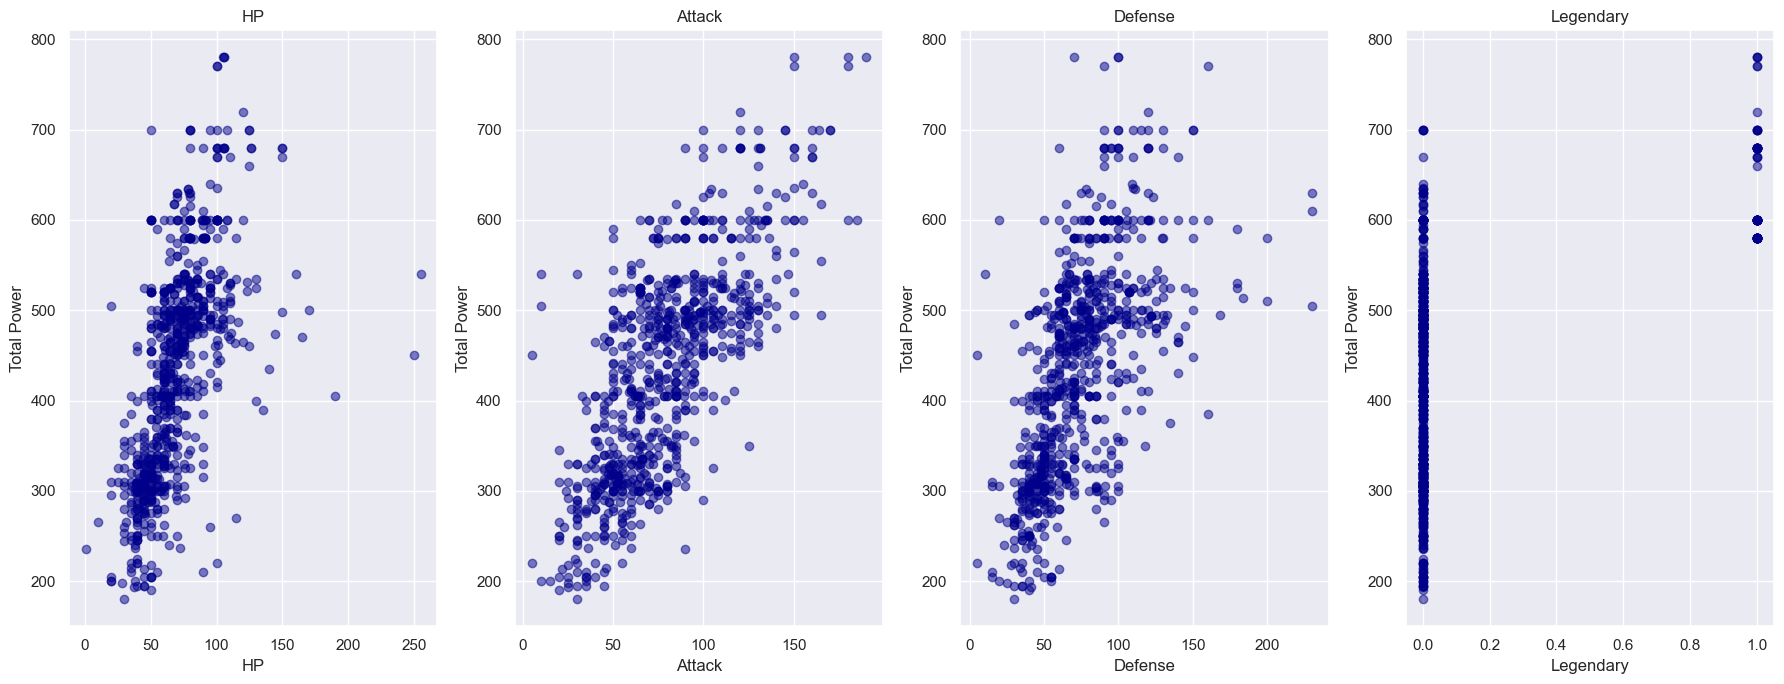

In [50]:
plt.figure(figsize=(18, 7))

predictors = df.drop(columns=['Total Power']).columns
response = df['Total Power']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df[col]
    y = response
    plt.scatter(x, y, marker='o', color='darkblue', alpha=0.5)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Total Power')
    plt.tight_layout()

<Axes: >

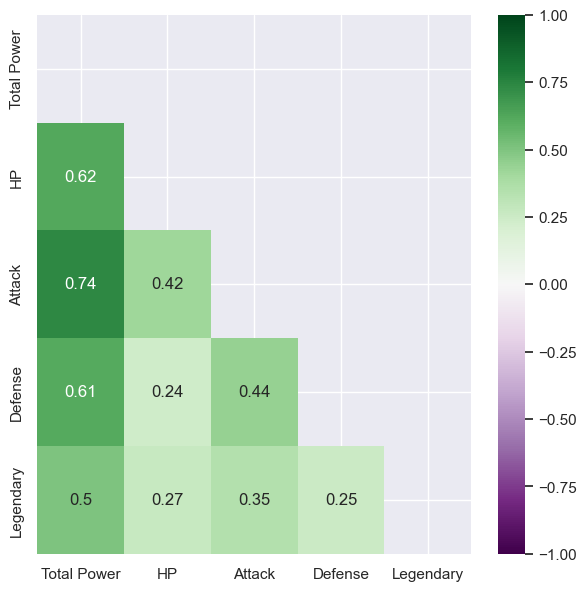

In [74]:
#untuk mengetahui korelasi linier antar variabel
mask = np.triu(np.ones_like(df.corr())) #agar yang muncul segitiga bawah
 
# annot = True untuk mencetak/ menampilkan nilai korelasi di dalam kotak
sns.set(rc={'figure.figsize':(7,7)}) 
sns.heatmap(df.corr(method='pearson').round(2), annot=True, cmap='PRGn', mask=mask, vmin=-1, vmax=1)

In [48]:
x_dummy = df_dummy.drop(columns=['Total Power'])
y_dummy = df_dummy['Total Power']

X_dummy = sm.add_constant(x_dummy)
result_dummy = sm.OLS(y_dummy, X_dummy).fit()
print(result_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Power   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     712.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.64e-261
Time:                        14:17:14   Log-Likelihood:                -4355.4
No. Observations:                 800   AIC:                             8721.
Df Residuals:                     795   BIC:                             8744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.0761      7.208     16.519      0.0

# Persamaan regresi dari output tersebut adalah:

Total Power = 119.0761 + 1.5162(HP) + 1.4528(Attack) + 1.2966(Defense) + 87.9382(Legendary)

Keterangan:

- Total Power : variabel dependen (Total kekuatan tiap pokemon)
- HP, Attack, Defense, Legendary : Variabel independen (Hitpoint/darah pokemon, besar nilai kekuatan pokemon, besar nilai pertahanan pokemon, pokeomon termasuk legendary atau tidak)

### Simultan test


$H_{0} : \beta_{1} = \beta_{2} = \beta_{3} = 0$


$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2,3$

In [51]:
df_simultan_dummy = pd.DataFrame({'F-hitung':[result_dummy.fvalue],
                                  'p-value':[result_dummy.f_pvalue],
                                  'alpha':[0.05]})

df_simultan_dummy['Kesimpulan'] = df_simultan_dummy['p-value'].gt((df_simultan_dummy['alpha']))
df_simultan_dummy['Kesimpulan'] = df_simultan_dummy['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_simultan_dummy

,F-hitung,p-value,alpha,Kesimpulan
0,712.229504,4.637243e-261,0.05,Tolak H0


### Kesimpulan

- Dengan tingkat signifikansi 5%, dikarenakan nilai F-hitung $_{(712.229504)}$ > F-tabel $_{(2.38313167)}$ nilai p-value $_{(4.637243e-261)}$ < alpha $_{(0.05)}$ maka kita akan tolak $H_{0}$ dan dapat disimpulkan bahwa minimal ada 1 variabel ($X$) yang berpengaruh terhadap variabel ($Y$)

Untuk $\beta_{1}$

$H_{0}: \beta_{1} = 0$

$H_{1}: \beta_{1} \neq 0$

Untuk $\beta_{2}$

$H_{0}: \beta_{2} = 0$

$H_{1}: \beta_{2} \neq 0$

Untuk $\beta_{3}$

$H_{0}: \beta_{3} = 0$

$H_{1}: \beta_{3} \neq 0$


In [52]:
df_partial_dummy = pd.DataFrame()
df_partial_dummy['Variabel'] = result_dummy.tvalues.index
df_partial_dummy['t-hitung'] = result_dummy.tvalues.values
df_partial_dummy['p-value'] = result_dummy.pvalues.values
df_partial_dummy['alpha'] = 0.05

df_partial_dummy['Kesimpulan'] = df_partial_dummy['p-value'].gt((df_partial_dummy['alpha']))
df_partial_dummy['Kesimpulan'] = df_partial_dummy['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_partial_dummy

,Variabel,t-hitung,p-value,alpha,Kesimpulan
0,const,16.519353,6.355004e-53,0.05,Tolak H0
1,HP,17.435463,6.750728e-58,0.05,Tolak H0
2,Attack,19.424848,4.426173e-69,0.05,Tolak H0
3,Defense,16.884028,6.888121e-55,0.05,Tolak H0
4,Legendary,11.163534,5.533009e-27,0.05,Tolak H0


### Kesimpulan

- Dengan tingkat signifikansi 5%, dikarenakan semua nilai t-hitung > t-tabel $_{(1.963)}$ dan semua nilai p-value < alpha $_{(0.05)}$ maka kita akan tolak $H_{0}$ dan dapat disimpulkan bahwa variabel `HP` ( $X_{1}$ ),  `Attack` ( $X_{2}$ ),  `Defense` ( $X_{3}$ ),  `Legendary` ( $X_{4}$ ) berpengaruh terhadap variabel  `Total Power` ( $Y$ )

In [73]:
df_model_evaluation = pd.DataFrame({'Model': 'Regression + Dummy Encoding',
                                    'R-Square': result_dummy.rsquared,
                                    'Adjusted R-Square': result_dummy.rsquared_adj}, index = [1])

df_model_evaluation

,Model,R-Square,Adjusted R-Square
1,Regression + Dummy Encoding,0.781828,0.780731


Berdasarkan output yang diberikan, terdapat evaluasi model regresi linier dengan Dummy Encoding:

- Model 1 (Regression + Dummy Encoding) memiliki R-Square sebesar 0.781828, yang menunjukkan bahwa model mampu menjelaskan sekitar 78.18% dari variasi dalam variabel target (Total Power). Nilai ini juga menunjukkan bahwa model sudah cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen.

- Model 1 (Regression + Dummy Encoding) memiliki Adjusted R-Square sebesar 0.780731, yang menunjukkan bahwa model mampu menjelaskan sekitar 78.07% dari variasi dalam variabel target setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model. Nilai ini juga menunjukkan bahwa model cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model.



Secara keseluruhan, model regresi menunjukkan kinerja yang baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen.